# NaN Plotting

In [1]:
from netCDF4 import Dataset
d = Dataset('./datasets/world_oscar_vel_5d2019.nc.gz', 'r', format='NETCDF4')

Read the `uf` data.

In [2]:
uf = d.variables['uf'][0][0]

Import matplotlib and numpy.

In [7]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from bokeh.plotting import figure, show
from bokeh.tile_providers import get_provider, Vendors
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

Get data for scatter plot.

In [8]:
nan_mask = uf.mask
x_axis = np.argwhere(nan_mask)[:,1]
y_axis = 139 - np.argwhere(nan_mask)[:,0]

Plot it.

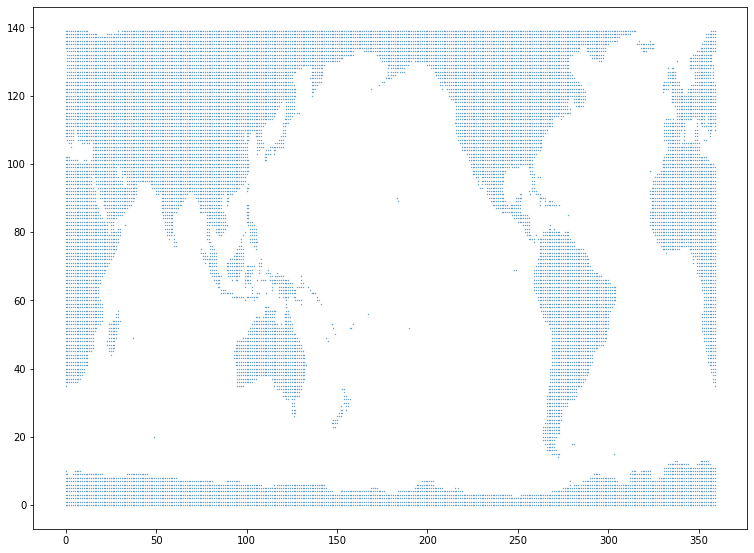

In [9]:
plt.figure(figsize=[12.8, 9.6])
plt.scatter(x_axis, y_axis, 0.1)
plt.show()

In [10]:
tile_provider = get_provider(Vendors.CARTODBPOSITRON)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(-2000000, 6000000), y_range=(-1000000, 7000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

show(p)